# Etivity 6 - Probability Theory

## Student Name: Mark Murnane
## Student ID: 18195326

## Problem Description


In a standard deck of cards, what is the probability of 3 cards yielding a score of 21 or more, where the cards values are:

 * Aces = 1
 * Numbered card = Face value
 * Face cards = 10
 

#### Reflection ####

Calculating the probability of the cards being > 21 this proved to be beyond my limited stats capabilities at this point.  It turns out to be a [Hypergeometric Distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution).  Choosing just the specific value (and not greater than) would be more straightforward as there are a finite number of ways that can be achieved. 

In this case, an experiment with a large number of individual tests should approximate closer and closer to the statistical probability, as the number of tests increases.  

Two tests below calculate a value for the probability of 3 cards yielding a score of 21 or more, based on experimental data.

 
## Requirements

 * Calculate the Expected Value of the draw
 * Calculate the Standard Deviation of the draw
 

## Implementation

A new deck is generated for each test.  The deck is represented as Python list as numpy arrays don't offer pop functionality.  The new deck is by default randomly shuffled as would be expected before the start of any game.  This can be overridden to test if there is a difference.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Code for the solution

def generate_new_deck(shuffle=True):
    ## Generates a list representing the card values of a new deck
    new_deck = []
    
    for i in range(4):
        for j in range(1,14):
            new_deck.append(min(j, 10))                   

    # The deck should always be shuffled before being returned
    if shuffle == True:
        np.random.shuffle(new_deck)
            
    return new_deck
        
    
def pick_card (card_deck):   
    ## Randomly removes a card from the deck and reports the position and value of the card
    selected_card = random.randrange(0, len(card_deck))
    selected_value = card_deck[selected_card]
    
    card_deck.pop(selected_card)
    
    return selected_value, selected_card, 


def run_test_case(cards_to_draw = 3):
    # Run an iteration of the test and return the value produced by drawing 3 cards
    card_deck = generate_new_deck()
    
    expected_values = []
    draw_score = 0
    
    
    for _ in range(cards_to_draw):
        draw_score += pick_card(card_deck)[0]
        expected_values.append(np.mean(card_deck))
        
    return np.array((draw_score, *expected_values))


def run_experiment(population_size, cards_to_draw=3):
    
    test_results = np.zeros((population_size, cards_to_draw + 1))    
    
    for i in range(population_size):      
        test_results[i] = run_test_case(cards_to_draw) 
    
    return test_results

In [33]:
def plot_card_draw_distribution(test_draw_scores, min_value = 3, max_value = 30, expected_value = None, mean = None):
    
    plt.title("Distribution of Scores for 3 Card Draw")
    plt.xlabel("Draw Score")
    plt.ylabel("Score Frequency in Sample")

    # Set the x-axis up correctly with limits.  Total score is 3 <= x <= 30
    # Need to configure the ticks and bins to have the tick marks centered under the bars
    plt.xlim(min_value - 1, max_value+1)
    plt.xticks(range(min_value - 1, max_value+1))
    plt.grid(True, axis='y', linestyle='--')

    bins = np.arange(min_value - 1, max_value+2) - 0.5

    # Plot the histogram
    plt.hist(test_draw_scores, bins, facecolor='#8EA9DB', edgecolor='black')

    # Add in the Expected value and the Mean if specified
    if expected_value:
        plt.axvline(expected_value, label="E[V]", color='r', linestyle='dotted')
        
    if mean:
        plt.axvline(draw_score_mean, label=u"\u03BC", color='g', linestyle='dashed')

    if expected_value or mean:
        plt.legend()

    plt.show()

## Tests

The Expected Value of a new deck of cards is: 6.538462
The Expected Value of a drawing 3 cards is assumed as: 19.615385

The mean value of the card draw is 19.4892
The median value of the card draw is 20.0000
The standard deviation of the distribution is 5.3412


**** The Problem Question ****

The % of draws where the value is >= 21 is: 51.64%





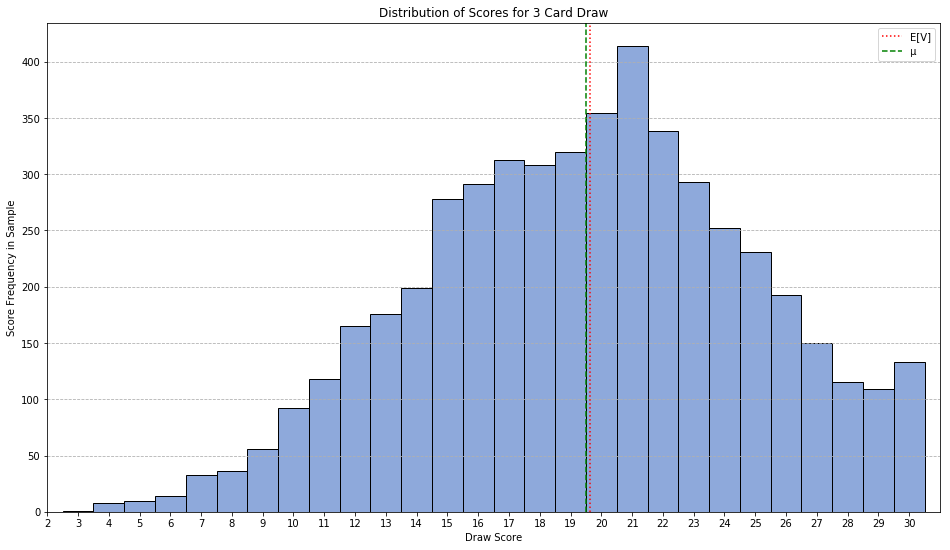

In [34]:
# Get the Expected Value of a new deck of cards
# For a single deck of cards, as the probability is a uniform distribution, the mean is the Expected Value

NUM_CARDS = 3
POP_SIZE = 5000

#####################################################
# Expected Value
#####################################################

card_deck = generate_new_deck()
expected_value = np.mean(card_deck)

print(f"The Expected Value of a new deck of cards is: {expected_value:.6f}")
print(f"The Expected Value of a drawing 3 cards is assumed as: {3 * expected_value:.6f}\n")

#####################################################
# Mean, Median and Standard Deviation
#####################################################

test_results = run_experiment(POP_SIZE, NUM_CARDS)
test_draw_scores = test_results[:,0]

draw_score_mean = np.mean(test_draw_scores)
draw_score_median = np.median(test_draw_scores)
draw_score_stddev = np.std(test_draw_scores)

print(f"The mean value of the card draw is {draw_score_mean:.4f}")
print(f"The median value of the card draw is {draw_score_median:.4f}")
print(f"The standard deviation of the distribution is {draw_score_stddev:.4f}")


hist, bins = np.histogram(test_draw_scores, bins=range(3,31))

print("\n\n**** The Problem Question ****\n")
print(f"The % of draws where the value is >= 21 is: {np.sum(hist[-10:])/POP_SIZE:.2%}")
print("\n\n")

#####################################################
# Graphing the results
#####################################################

# Adjust the size of the graph as E[V] and mu are very similar
plt.rcParams["figure.figsize"] = (16,9)

plot_card_draw_distribution(test_draw_scores, expected_value=NUM_CARDS*expected_value, mean=draw_score_mean)

#### Larger Sample

The % of draws where the value is >= 21 is: 52.52%


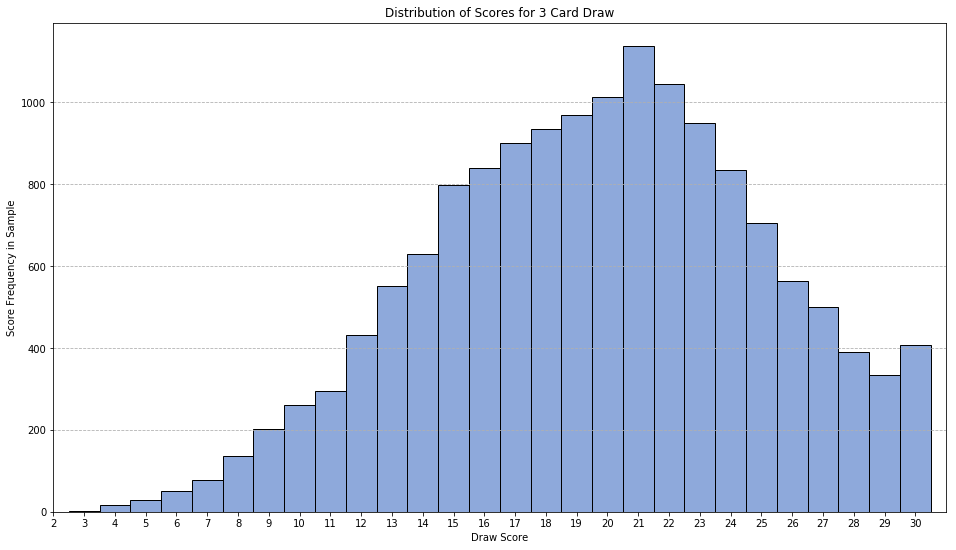

In [35]:
large_test_results = run_experiment(POP_SIZE*3, NUM_CARDS)
large_test_draw_scores = large_test_results[:,0]

hist, bins = np.histogram(large_test_draw_scores, bins=range(3,31))

print(f"The % of draws where the value is >= 21 is: {np.sum(hist[-10:])/(POP_SIZE*3):.2%}")

#####################################################
# Graphing the results
#####################################################

plot_card_draw_distribution(large_test_draw_scores)

## Manual Calculations


### Expected Value

The Expected Value for a single card draw can be calculated by adding the probability of drawing each number.  In the deck of 52 cards, the values 1-9 are represented 4 times each and the value 10 is represented 16 times.

$
\quad\quad
\begin{align}
E[V] =  \sum\limits_{i=1}^{52}{v_i}{p_i} &= 1\cdot\frac{1}{52} + 1\cdot\frac{1}{52} + 1\cdot\frac{1}{52} + 1\cdot\frac{1}{52} + 2\cdot\frac{1}{52} + \cdots + 10\cdot\frac{1}{52} + 10\cdot\frac{1}{52} + 10\cdot\frac{1}{52} + 10\cdot\frac{1}{52} \\
&= 1\cdot\frac{4}{52} + 2\cdot\frac{4}{52} + 3\cdot\frac{4}{52} + 4\cdot\frac{4}{52} + 5\cdot\frac{4}{52} + 6\cdot\frac{4}{52} + 7\cdot\frac{4}{52} + 8\cdot\frac{4}{52} + 9\cdot\frac{4}{52} + 10\cdot\frac{16}{52} \\
&= \frac{340}{52} \\
&= 6.538462
\end{align}
$

Equally, as the numbers are repeated we could simply work out the Expected Value for a single suit.  As the distribution of the values doesn't change, it is equivalent to calculating for the larger set.

$
\quad\quad
\begin{align}
E[V] =  \sum\limits_{i=1}^{13}{v_i}{p_i} &= 1\cdot\frac{1}{13} + 2\cdot\frac{1}{13} + 3\cdot\frac{1}{13} + 4\cdot\frac{1}{13} + 5\cdot\frac{1}{13} + 6\cdot\frac{1}{13} + 7\cdot\frac{1}{13} + 8\cdot\frac{1}{13} + 9\cdot\frac{1}{13} + 10\cdot\frac{4}{13} \\
&= \frac{85}{13} \\
&= 6.538462
\end{align}
$


As we have a _Uniform Distribution_ the above same as calculating the arithmetic mean:

$
\quad\quad
\begin{align}
\bar{v} &= (1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 10 + 10 + 10)\cdot\frac{1}{13} \\
&= (85)\cdot\frac{1}{13}
\end{align}
$


**N.B.** After initially stating the problem, I realised that calculating the _Expected Value_ for the combination is quite a challenge as there are $ { 52 \choose 3} $ = 22,100 possibilities.  As part of the experiment then I chose to capture the Expected Value of the deck at each point in the draw and if possible plot those in relation to an assumed Expected Value for 3 draws of 3 x Expected Value for a single draw.

### Standard Deviation

For manual calculation of the Standard Deviation we need to calculate the variance of the data set, which is the average of the sum of the square differences from the mean, $\mu$.

$
\quad\quad\quad\quad
\sigma = \sqrt{\frac{1}{N}\sum\limits_{i=1}^{N}{(x_i - \mu)^2}}
$

A small subset will be used to make the calculation practical (vs. the large value sample size above).  We'll also confine this a single draw as we have a proper mean for that.

In [36]:
stddev_test = run_experiment(10, 1)
stddev_test_scores = stddev_test[:,0]

print(stddev_test_scores)

[ 7.  9. 10.  9. 10.  5.  2.  6.  7.  3.]


To calculate the Standard Deviation we need to calculate square root of the variance.  From the previous exercise we know that the mean for a single draw of cards is $\mu\ = 6.538.

$
\begin{align}
\sigma^2 &= \frac{(10-6.538)^2 + (3 - 6.538)^2 + (3 - 6.538)^2 + (7 - 6.538)^2 + (10 - 6.538)^2 + (5 - 6.538)^2 + (9 - 6.538)^2 + (5 - 6.538)^2 + (7 - 6.538)^2 + (2 - 6.538)^2}{10} \\
\\
&= \frac{(11.985 + 12.517 + 12.517 + 0.213 + 11.985 + 2.365 + 6.061 + 2.365 + 0.213 + 20.593)}{10} \\
\\
&= \frac{80.814}{10} \\
\\
&= 8.0814 \\
\\
\\
\sigma &= \sqrt{8.0814} \\
&= 2.843
\end{align}
$

The value returned by numpy is:

In [37]:
print(np.std(stddev_test_scores))

2.6758176320519302
